In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

## Text data is replaced with numerical value
### (Departement):- sales=0, Marketing=1, IT=2, accounting=3, hr=4, techinical=5, support=6, management=7, product_mng=8, RandD=9.
### low_salary=0, medium_salary=1, High_salary=2

In [3]:
data=pd.read_csv('HR_comma_sep.csv')
data.head(6)



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0


## Data Exploration

In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.617041,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.931069,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  int64  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [6]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [6]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,3.666958,0.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,3.457295,0.414730


## Data Visualization

<AxesSubplot:xlabel='salary'>

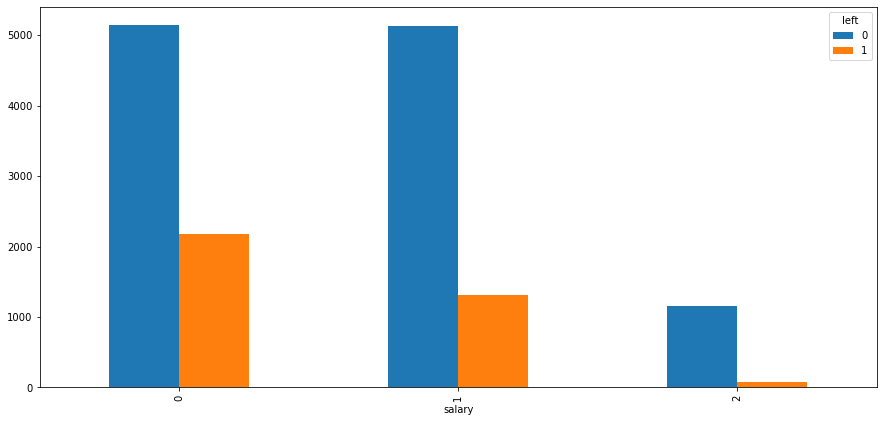

In [15]:
pd.crosstab(data.salary, data.left).plot(kind='bar', figsize=(15,7))

<AxesSubplot:xlabel='time_spend_company'>

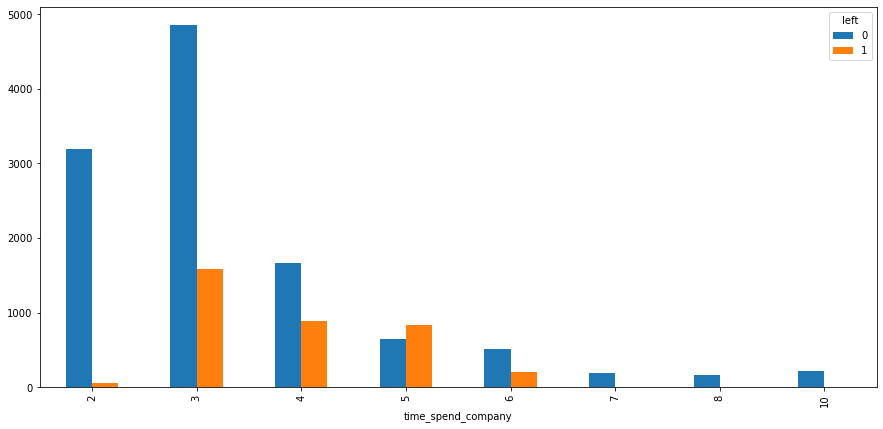

In [16]:
pd.crosstab(data.time_spend_company, data.left).plot(kind='bar', figsize=(15,7))

<AxesSubplot:xlabel='Department'>

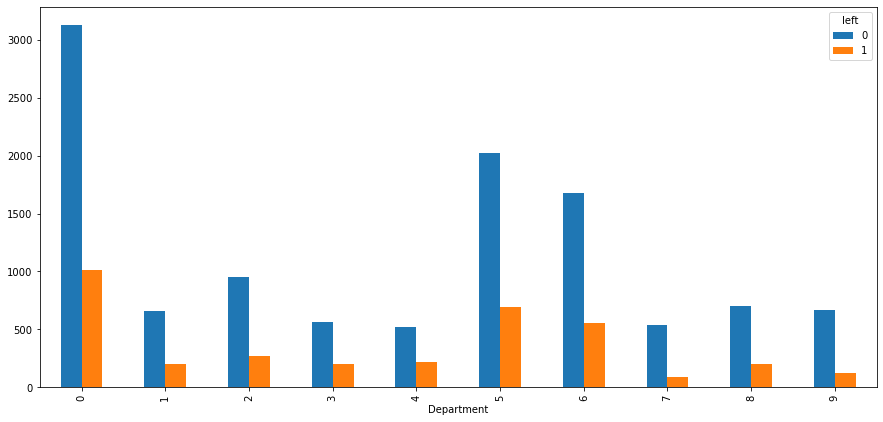

In [17]:
pd.crosstab(data.Department, data.left).plot(kind='bar', figsize=(15,7))

<AxesSubplot:xlabel='Work_accident'>

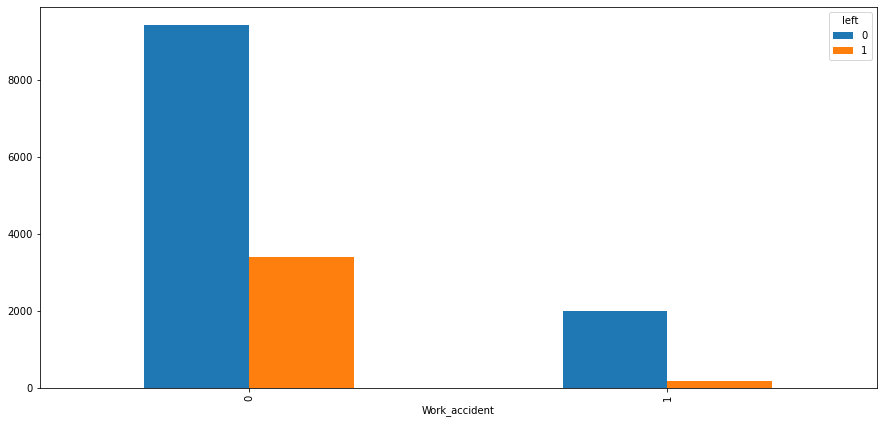

In [18]:
pd.crosstab(data.Work_accident, data.left).plot(kind='bar', figsize=(15,7))

<AxesSubplot:xlabel='promotion_last_5years'>

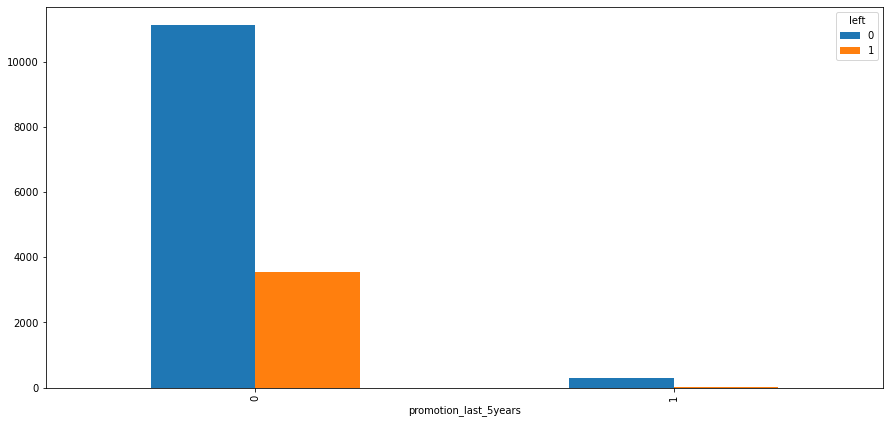

In [19]:
pd.crosstab(data.promotion_last_5years, data.left).plot(kind='bar', figsize=(15,7))

<AxesSubplot:xlabel='Department'>

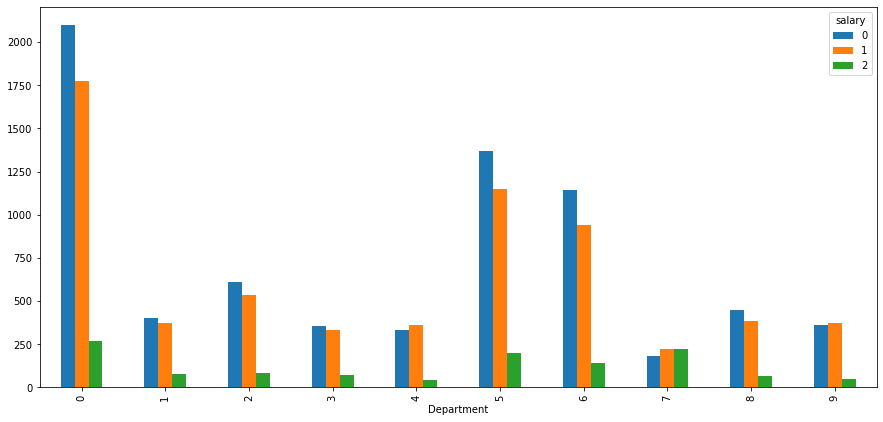

In [20]:
pd.crosstab(data.Department, data.salary).plot(kind='bar', figsize=(15,7))

In [8]:
person_left=(data['left']==1).sum()
person_no_left=(data['left']==0).sum()
print("no. of person left the company:",person_left)
print("no. of persons who didnt left the company:",person_no_left)

no. of person left the company: 3571
no. of persons who didnt left the company: 11428


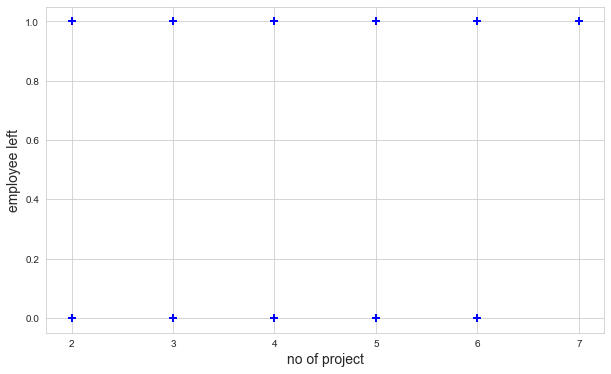

In [10]:
plt.figure(figsize=[10,6])
plt.xlabel('no of project',fontsize=14)
plt.ylabel('employee left',fontsize=14)
plt.scatter(data['number_project'],data['left'],s=80,marker='+',alpha=0.7,color='blue')
plt.show()

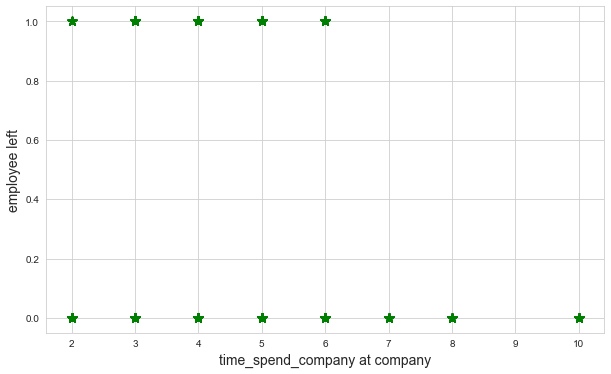

In [11]:
plt.figure(figsize=[10,6])
plt.xlabel('time_spend_company at company',fontsize=14)
plt.ylabel('employee left',fontsize=14)
plt.scatter(data['time_spend_company'],data['left'],s=80,marker='*',alpha=0.7,color='green')
plt.show()

plt.figure(figsize=[10,6])
plt.xlabel('department',fontsize=14)
plt.ylabel('employee left',fontsize=14)
plt.scatter(data['Department'],data['left'],s=80,alpha=0.7,color='green')
plt.show()

sns.pairplot(data,kind='reg')

## Correlation Matrices

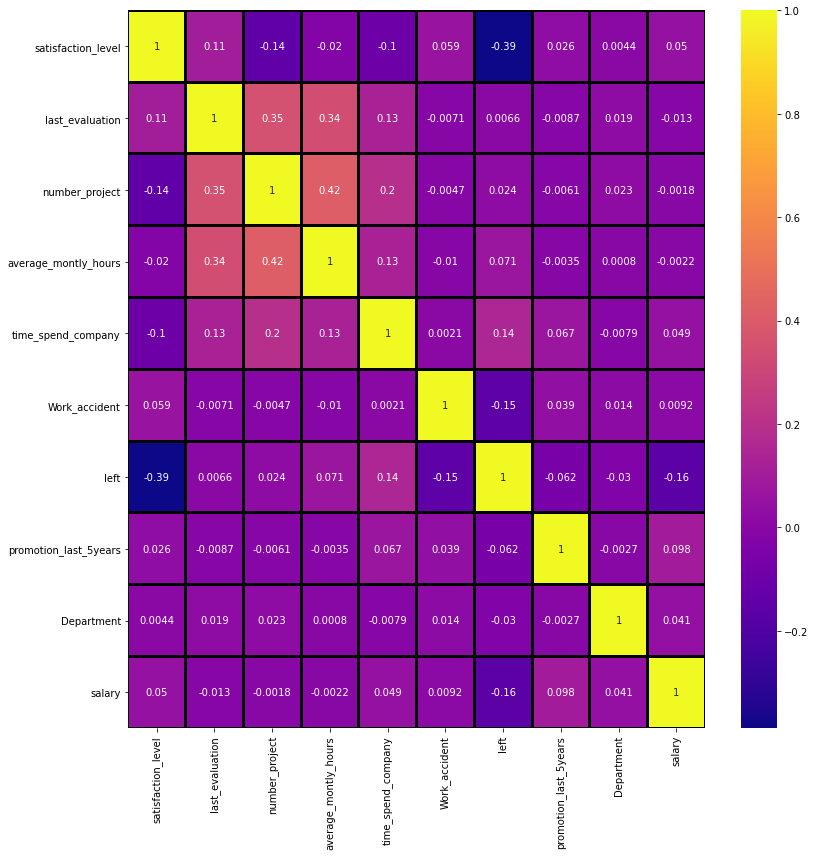

In [10]:
plt.figure(figsize=[12,12])
sns.heatmap(data.corr(),cmap='plasma',linewidths=2,linecolor='black',annot=True)
plt.tight_layout()
plt.show()

## Features selection

In [11]:
data=data.drop(["left","last_evaluation"],axis="columns")


In [7]:
target=data['left']


## Model Training

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.33,random_state=30)

In [13]:
len(y_test)

4950

## Model training using sk-learn logistic regression

In [14]:
model=LogisticRegression(max_iter=500)

In [15]:
result=model.fit(X_train,y_train)

In [16]:
y_predict=model.predict(X_test)

In [17]:
model.score(X_test,y_test)

0.8

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(model.predict_proba(X_test))

[[0.77848655 0.22151345]
 [0.81268828 0.18731172]
 [0.73624579 0.26375421]
 ...
 [0.88330832 0.11669168]
 [0.47946918 0.52053082]
 [0.64135407 0.35864593]]


In [20]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3770
           1       0.63      0.40      0.49      1180

    accuracy                           0.80      4950
   macro avg       0.73      0.66      0.68      4950
weighted avg       0.78      0.80      0.78      4950



## Model predicition using kNeighbors classifier which may give higher accuracy 

In [21]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1)

In [22]:
knn_predict=knn.predict(X_test)

In [23]:
knn.score(X_test,y_test)

0.9276767676767677

In [24]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3770
           1       0.81      0.90      0.86      1180

    accuracy                           0.93      4950
   macro avg       0.89      0.92      0.90      4950
weighted avg       0.93      0.93      0.93      4950



## Here we see the accuracy goes upto 0.93 and f1-score become 0.95 which is much better than previous sklern logistic regression algorithm

In [ ]:
def HR_analytic(Department,salary,No_of_project,Avg_mon_hours):
    